In [1]:
%matplotlib inline

## Load BehavioralCloning class from model.py

In [2]:
%run -n model.py

Using TensorFlow backend.


## Initialize model parameters

In [3]:
# Model parameters
csv_filename = 'data/driving_log.csv'
zero_frac = 0.25   # fraction of 0 steering records to be left after undersampling
m_frac = 0.6       # fraction of -1 steering records to be left after undersampling 
p_frac = 0.6       # fraction of 1 steering records to be left after undersampling
correction = 0.2   # steering correction for left and right camera images
top_crop, bottom_crop, left_crop, right_crop = 60, 25, 0, 0    # image crop parameters
layers = 2         # number of layers in input images
batch_size = 32    # initial batch size (is doubled by adding flipped images)
EPOCHS = 5        # number of training epocha
model_filename = 'model.h5'

## Create model instance

In [4]:
cloningModel = BehavioralCloning(csv_filename, model_filename, layers, zero_frac, m_frac, p_frac, correction, top_crop, bottom_crop, left_crop, right_crop, batch_size, EPOCHS)

## Data preprocessing

In [5]:
cloningModel.preview()

,center,left,right,steering
0,data/data22/IMG/center_2017_03_18_12_40_55_930...,data/data22/IMG/left_2017_03_18_12_40_55_930.jpg,data/data22/IMG/right_2017_03_18_12_40_55_930.jpg,0.0
1,data/data22/IMG/center_2017_03_18_12_40_56_003...,data/data22/IMG/left_2017_03_18_12_40_56_003.jpg,data/data22/IMG/right_2017_03_18_12_40_56_003.jpg,0.0
2,data/data22/IMG/center_2017_03_18_12_40_56_074...,data/data22/IMG/left_2017_03_18_12_40_56_074.jpg,data/data22/IMG/right_2017_03_18_12_40_56_074.jpg,0.0
3,data/data22/IMG/center_2017_03_18_12_40_56_148...,data/data22/IMG/left_2017_03_18_12_40_56_148.jpg,data/data22/IMG/right_2017_03_18_12_40_56_148.jpg,0.0
4,data/data22/IMG/center_2017_03_18_12_40_56_219...,data/data22/IMG/left_2017_03_18_12_40_56_219.jpg,data/data22/IMG/right_2017_03_18_12_40_56_219.jpg,0.0


In [6]:
cloningModel.describe('steering')

count    27834.000000
mean         0.002097
std          0.428305
min         -1.000000
25%         -0.035237
50%          0.000000
75%          0.043641
max          1.000000
Name: steering, dtype: float64

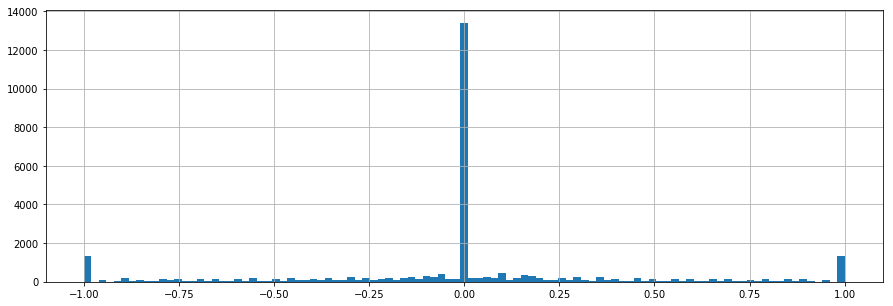

In [7]:
cloningModel.histogram('steering')

In [8]:
cloningModel.undersample()

In [9]:
cloningModel.describe('steering')

count    16846.000000
mean         0.002633
std          0.490203
min         -1.000000
25%         -0.241327
50%          0.000000
75%          0.240272
max          1.000000
Name: steering, dtype: float64

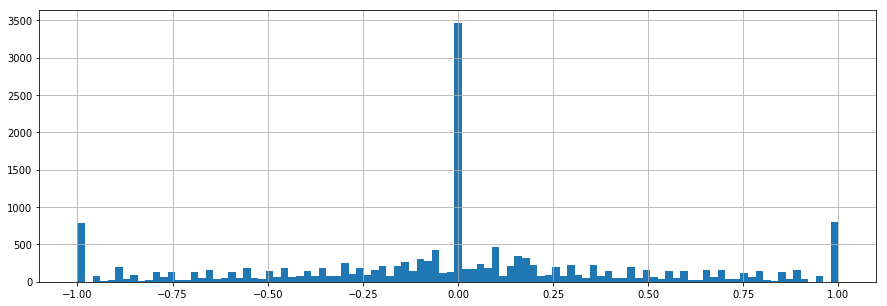

In [10]:
cloningModel.histogram('steering')

In [11]:
cloningModel.augment_center()

In [12]:
cloningModel.preview()

,image,steering
0,data/data/IMG/right_2016_12_01_13_39_01_803.jpg,-0.157377
1,data/data/IMG/left_2016_12_01_13_46_37_511.jpg,0.200000
2,data/data2back/IMG/left_2017_03_18_13_50_40_67...,1.200000
3,data/data22/IMG/center_2017_03_18_12_44_04_502...,-0.667914
4,data/data/IMG/right_2016_12_01_13_35_28_195.jpg,-0.099966


In [13]:
cloningModel.describe('steering')

count    50538.000000
mean         0.002633
std          0.516679
min         -1.200000
25%         -0.273673
50%          0.000000
75%          0.287688
max          1.200000
Name: steering, dtype: float64

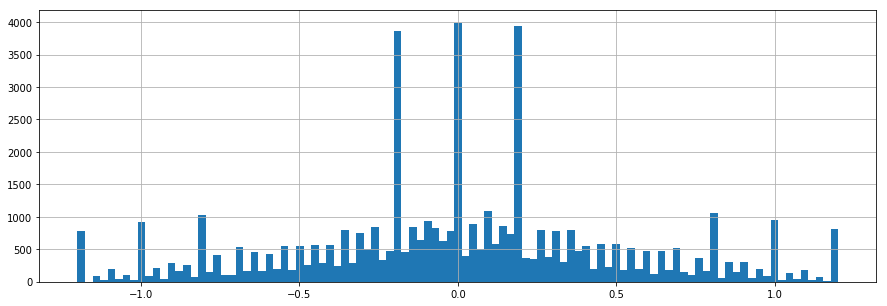

In [14]:
cloningModel.histogram('steering')

## Choice of image preprocessing

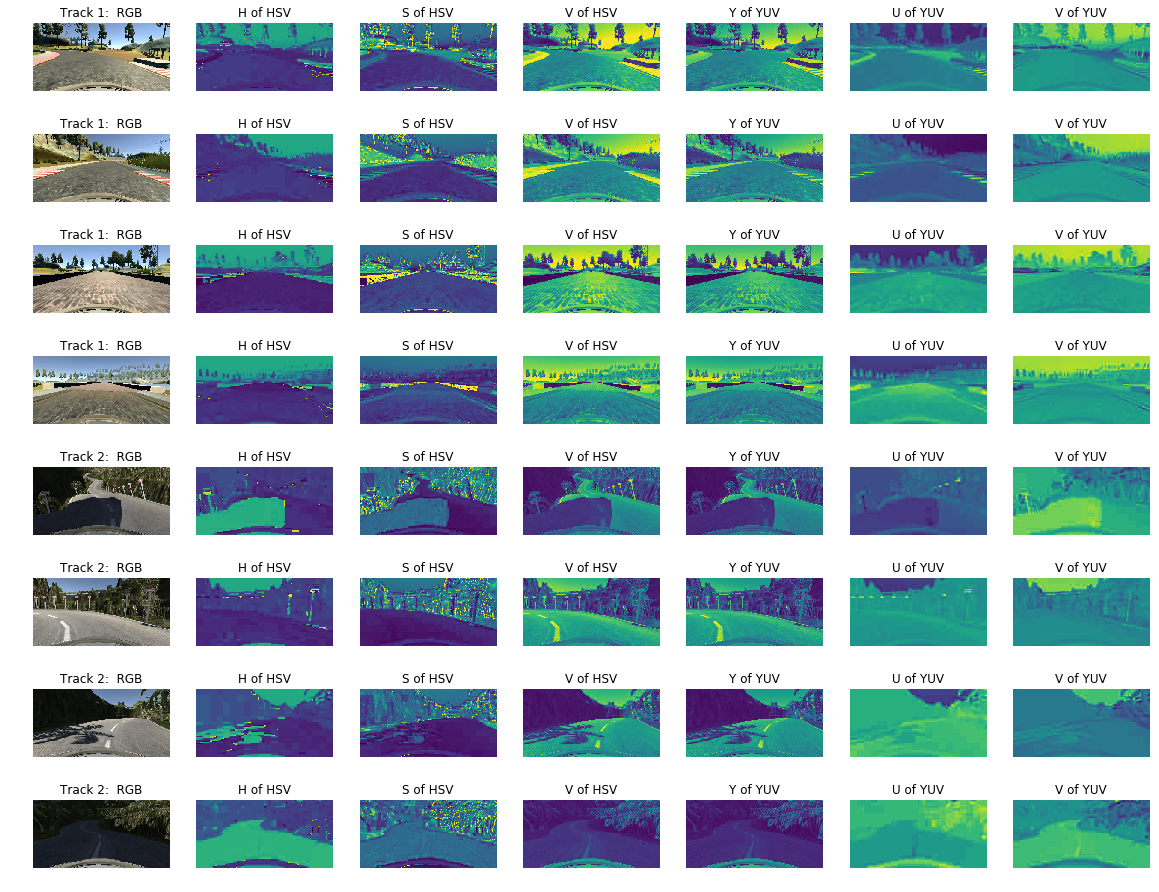

In [15]:
# Plotting typical images in HSV and YUV color spaces
import glob

images = glob.glob('examples/Track1/*.jpg') + glob.glob('examples/Track2/*.jpg')

fig, axs = plt.subplots(8, 7, figsize=(20, 16))
    
i = 0    
for i in range(8):
    filename = images[i]
    image = mpimg.imread(filename)
    axs[i,0].axis('off')
    axs[i,0].imshow(image)
    if i<4:
        axs[i,0].set_title('Track 1:  RGB') 
    else:    
        axs[i,0].set_title('Track 2:  RGB') 

    axs[i,1].axis('off')
    axs[i,1].imshow(cv2.cvtColor(image, cv2.COLOR_RGB2HSV)[:,:,0])
    axs[i,1].set_title('H of HSV') 
    
    axs[i,2].axis('off')
    axs[i,2].imshow(cv2.cvtColor(image, cv2.COLOR_RGB2HSV)[:,:,1])
    axs[i,2].set_title('S of HSV') 
    
    axs[i,3].axis('off')
    axs[i,3].imshow(cv2.cvtColor(image, cv2.COLOR_RGB2HSV)[:,:,2])
    axs[i,3].set_title('V of HSV') 
    
    axs[i,4].axis('off')
    axs[i,4].imshow(cv2.cvtColor(image, cv2.COLOR_RGB2YUV)[:,:,0])
    axs[i,4].set_title('Y of YUV') 

    axs[i,5].axis('off')
    axs[i,5].imshow(cv2.cvtColor(image, cv2.COLOR_RGB2YUV)[:,:,1])
    axs[i,5].set_title('U of YUV') 
   
    axs[i,6].axis('off')
    axs[i,6].imshow(cv2.cvtColor(image, cv2.COLOR_RGB2YUV)[:,:,2])
    axs[i,6].set_title('V of YUV')

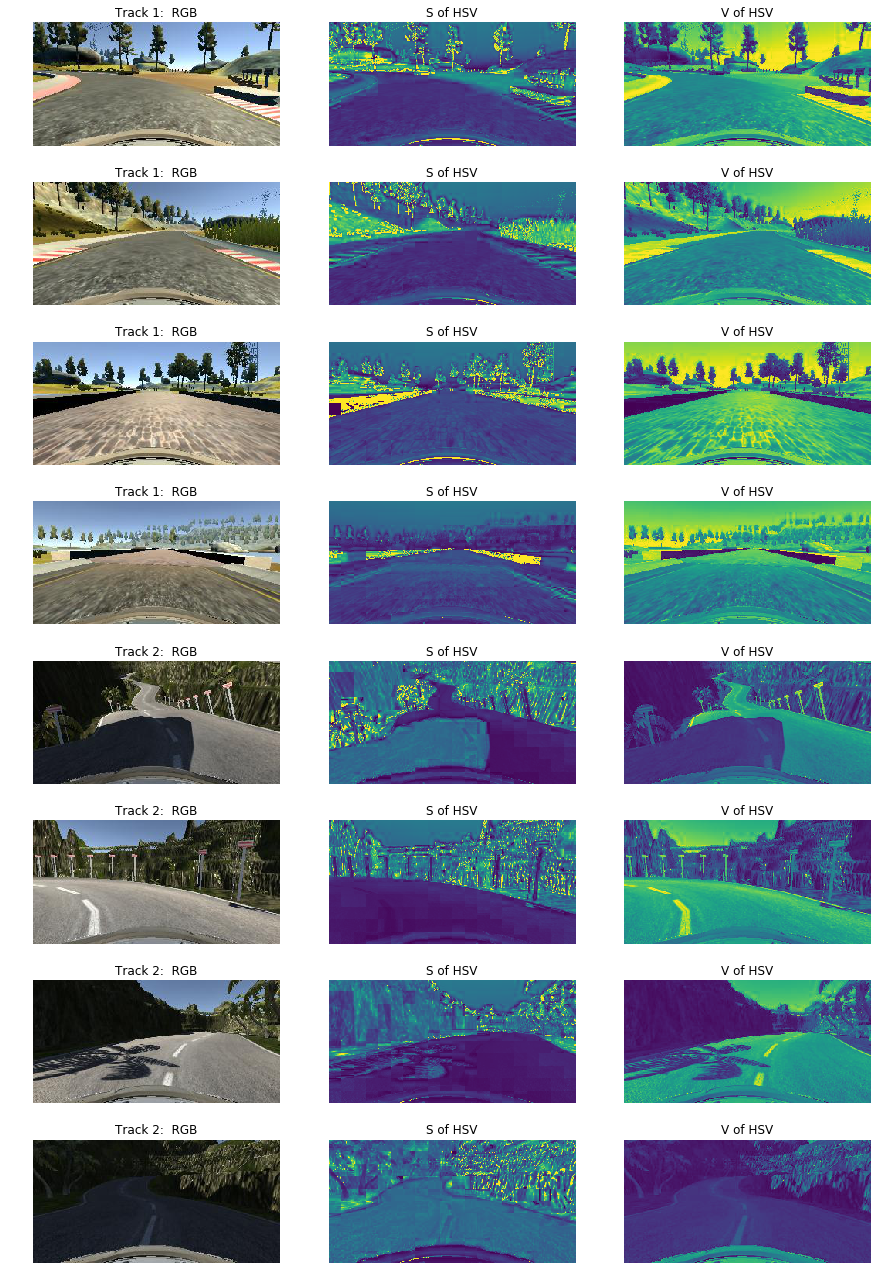

In [16]:
fig, axs = plt.subplots(8, 3, figsize=(15, 23))
    
i = 0    
for i in range(8):
    filename = images[i]
    image = mpimg.imread(filename)
    axs[i,0].axis('off')
    axs[i,0].imshow(image)
    if i<4:
        axs[i,0].set_title('Track 1:  RGB') 
    else:    
        axs[i,0].set_title('Track 2:  RGB') 

    axs[i,1].axis('off')
    axs[i,1].imshow(cv2.cvtColor(image, cv2.COLOR_RGB2HSV)[:,:,1])
    axs[i,1].set_title('S of HSV') 
    
    axs[i,2].axis('off')
    axs[i,2].imshow(cv2.cvtColor(image, cv2.COLOR_RGB2HSV)[:,:,2])
    axs[i,2].set_title('V of HSV') 

## Training and validating the model

In [17]:
cloningModel.split_train_validation()

(40430, 10108)

In [18]:
cloningModel.train(verbose=0)

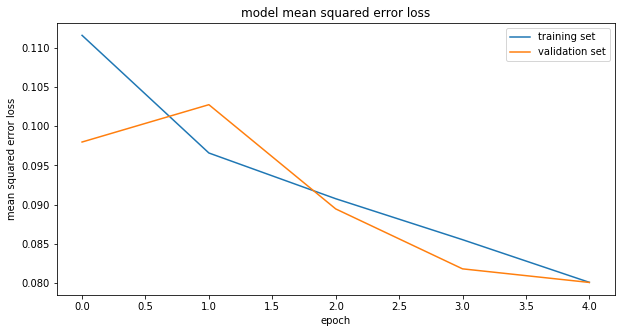

In [19]:
cloningModel.plot_loss()

In [20]:
cloningModel.history_object.history['loss']

[0.11159010013082138,
 0.096580970661787002,
 0.090747718302560218,
 0.085521911355732921,
 0.080078374252972734]

In [21]:
cloningModel.history_object.history['val_loss']

[0.097981149552601524,
 0.10274461942802647,
 0.089447846252148355,
 0.081800037820288732,
 0.080065001396379024]